In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import datetime


from tqdm import tqdm
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix as cf_matrix

In [2]:
df = pd.read_json('final_df.json')

In [3]:
corp_list = ['aut', 'czc', 'den', 'deu', 'eng', 'esp', 'nld', 'nzl', 'swe']
corp_dict = dict.fromkeys(corp_list)
corp_dict['aut'] = 'Austria'
corp_dict['czc'] = 'Czechia'
corp_dict['den'] = 'Denmark'
corp_dict['deu'] = 'Germany'
corp_dict['eng'] = 'United Kingdom'
corp_dict['esp'] = 'Spain'
corp_dict['nld'] = 'Netherlands'
corp_dict['nzl'] = 'New Zealand'
corp_dict['swe'] = 'Sweden'

topic_list = ['soc', 'rel', 'eth', 'pos']
topic_dict = dict.fromkeys(topic_list)
topic_dict['soc'] = 'Socioeconomic'
topic_dict['rel'] = 'Religious'
topic_dict['eth'] = 'Ethnic'
topic_dict['pos'] = 'Post-Materialist'

In [22]:
result_df = pd.DataFrame()

for topic in topic_list:
    independent = topic + '_polarisation'
    dependent1 = 'p90p10'
    dependent2 = 'p0p10_abs'
    dependent3 = 'unemployment'
    control = 'left_gov'
    
    formula =  independent + ' ~ ' + dependent1 + ' + '  + dependent2 + ' + '  + dependent3 + ' + ' + control + ' + C(year) + C(corp)'

    lin_reg = smf.ols(formula = formula, data = df).fit()
    print(f"Independent: {independent}")
    print(f"Dependent1: {dependent1}, Coef: {round(lin_reg.params[dependent1], 4)}, SE: {round(lin_reg.bse[dependent1], 4)}, p-value: {round(lin_reg.pvalues[dependent1], 4)}")
    print(f"Dependent2: {dependent2}, Coef: {round(lin_reg.params[dependent2], 4)}, SE: {round(lin_reg.bse[dependent2], 4)}, p-value: {round(lin_reg.pvalues[dependent2], 4)}")
    print(f"Dependent3: {dependent3}, Coef: {round(lin_reg.params[dependent3], 4)}, SE: {round(lin_reg.bse[dependent3], 4)}, p-value: {round(lin_reg.pvalues[dependent3], 4)}")
    print(f"Control: {control}, Coef: {round(lin_reg.params[control], 4)}, SE: {round(lin_reg.bse[control], 4)}, p-value: {round(lin_reg.pvalues[control], 4)}")
    print('')

    variable_list = [dependent1, '', dependent2, '', dependent3, '', control, '']
    value_list = [round(lin_reg.params[dependent1], 4), '('+str(round(lin_reg.bse[dependent1], 4))+')', 
                 round(lin_reg.params[dependent2], 4), '('+str(round(lin_reg.bse[dependent2], 4))+')',
                 round(lin_reg.params[dependent3], 4), '('+str(round(lin_reg.bse[dependent3], 4))+')',
                 round(lin_reg.params[control], 4), '('+str(round(lin_reg.bse[control], 4))+')']
    
    result_df['variables'] = variable_list
    result_df[topic + '2'] = value_list
    
for topic in topic_list:
    independent = topic + '_polarisation'
    dependent1 = 'p90p10'

    
    formula =  independent + ' ~ ' + dependent1 + ' + C(year) + C(corp)'

    lin_reg = smf.ols(formula = formula, data = df).fit()
    value_list = [round(lin_reg.params[dependent1], 4), '('+str(round(lin_reg.bse[dependent1], 4))+')', '', '', '', '', '', '']
    result_df[topic + '1'] = value_list
    
    print(f"Independent: {independent}")
    print(f"Dependent1: {dependent1}, Coef: {round(lin_reg.params[dependent1], 4)}, SE: {round(lin_reg.bse[dependent1], 4)}, p-value: {round(lin_reg.pvalues[dependent1], 4)}")



Independent: soc_polarisation
Dependent1: p90p10, Coef: -0.1322, SE: 0.3304, p-value: 0.6895
Dependent2: p0p10_abs, Coef: 2.7212, SE: 4.2153, p-value: 0.5193
Dependent3: unemployment, Coef: 0.1121, SE: 0.1551, p-value: 0.4706
Control: left_gov, Coef: -2.5722, SE: 0.7525, p-value: 0.0008

Independent: rel_polarisation
Dependent1: p90p10, Coef: -0.1896, SE: 0.6863, p-value: 0.7826
Dependent2: p0p10_abs, Coef: -3.461, SE: 8.7541, p-value: 0.693
Dependent3: unemployment, Coef: 0.0493, SE: 0.3221, p-value: 0.8786
Control: left_gov, Coef: -3.5401, SE: 1.5628, p-value: 0.0246

Independent: eth_polarisation
Dependent1: p90p10, Coef: -0.4863, SE: 0.8531, p-value: 0.5693
Dependent2: p0p10_abs, Coef: 1.7434, SE: 10.8821, p-value: 0.8729
Dependent3: unemployment, Coef: -0.2463, SE: 0.4004, p-value: 0.5393
Control: left_gov, Coef: -2.4737, SE: 1.9428, p-value: 0.2045

Independent: pos_polarisation
Dependent1: p90p10, Coef: 0.2468, SE: 0.5489, p-value: 0.6536
Dependent2: p0p10_abs, Coef: 15.4214, SE

In [95]:
result_df = result_df[['variables', 'soc1', 'soc2', 'rel1', 'rel2', 'eth1', 'eth2', 'pos1', 'pos2']]

In [96]:
print(result_df.to_latex())

\begin{tabular}{llllllllll}
\toprule
{} &     variables &      soc1 &      soc2 &      rel1 &      rel2 &      eth1 &       eth2 &      pos1 &      pos2 \\
\midrule
0 &        p90p10 &   -0.2496 &   -0.1322 &    0.0564 &   -0.1896 &    -0.539 &    -0.4863 &   -0.5782 &    0.2468 \\
1 &               &  (0.2346) &  (0.3304) &  (0.4788) &  (0.6863) &  (0.5906) &   (0.8531) &  (0.3903) &  (0.5489) \\
2 &     p0p10\_abs &           &    2.7212 &           &    -3.461 &           &     1.7434 &           &   15.4214 \\
3 &               &           &  (4.2153) &           &  (8.7541) &           &  (10.8821) &           &  (7.0021) \\
4 &  unemployment &           &    0.1121 &           &    0.0493 &           &    -0.2463 &           &    0.3618 \\
5 &               &           &  (0.1551) &           &  (0.3221) &           &   (0.4004) &           &  (0.2577) \\
6 &      left\_gov &           &   -2.5722 &           &   -3.5401 &           &    -2.4737 &           &   -3.4224 \\
7 &    

/tmp/ipykernel_13415/2225388708.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(result_df.to_latex())


In [5]:
sns.set_style({'font.family':'serif', 'font.serif':'Computer Modern'})

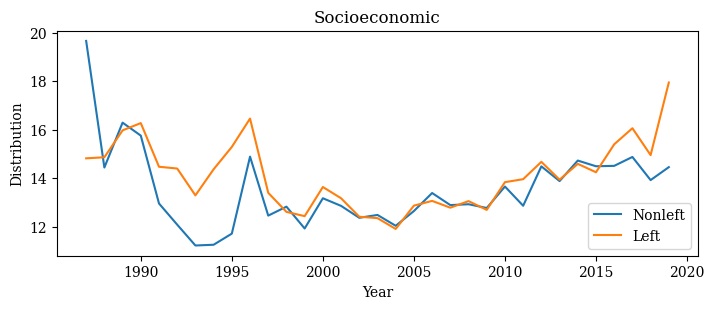

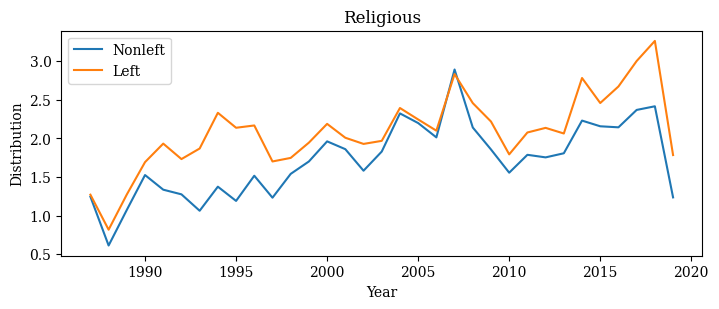

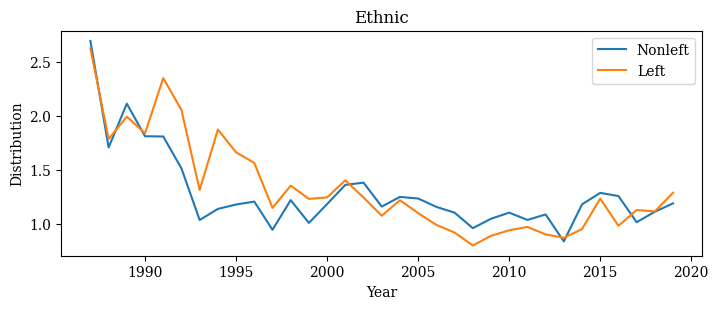

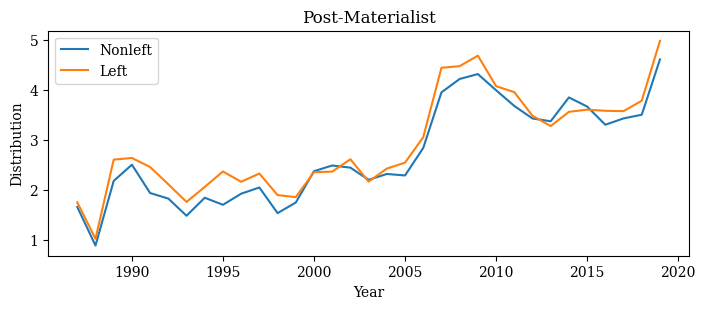

In [85]:

for topic in topic_list:
    plot_df = df
    fig, ax = plt.subplots(figsize=(8.27, 11.69/4))
#         ax2 = ax.twinx()  # Create a second y-axis on the right side
    sns.lineplot(x='year', y=topic+'_nonleft_dist_prop', data=plot_df, label='Nonleft', ax=ax, ci = None).set(title =topic_dict[topic])
    sns.lineplot(x='year', y=topic+'_left_dist_prop', data=plot_df, label='Left', ax=ax, ci = None)
#     sns.lineplot(x='year', y=topic+'_polarisation', data=plot_df, label='Polarisation', ax=ax2, color = 'red', linestyle = '--',ci = 'sd')
    ax.set_xlabel('Year')
    ax.set_ylabel('Distribution')
#         ax2.set_ylabel('Polarisation')
#         ax2.set_ylim(60, 100)

#         h1, l1 = ax.get_legend_handles_labels()
#         h2, l2 = ax2.get_legend_handles_labels()
#         ax.legend(h1 + h2, l1 + l2, loc = 2)
#         ax2.legend().remove()

    plt.show()

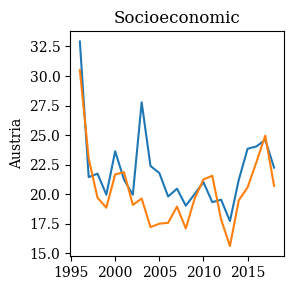

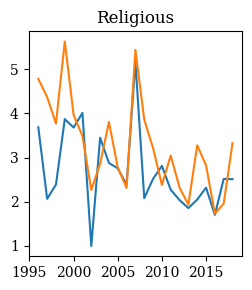

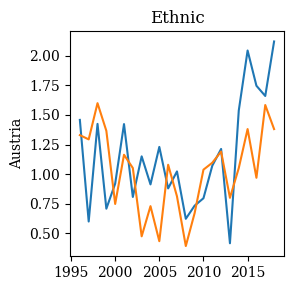

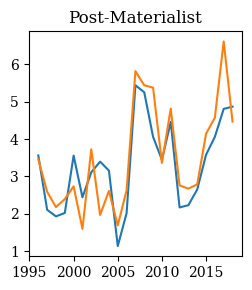

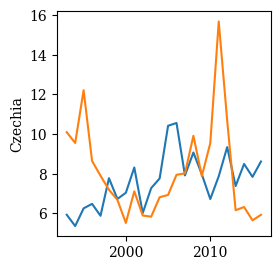

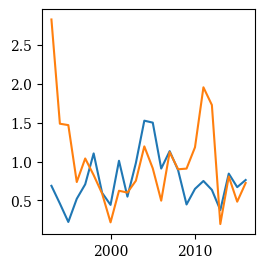

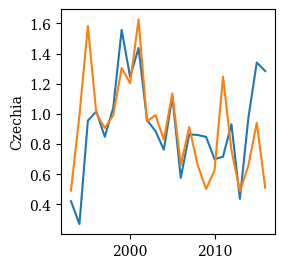

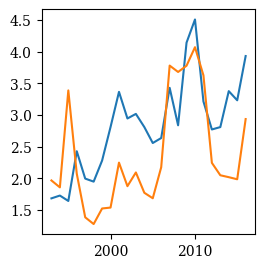

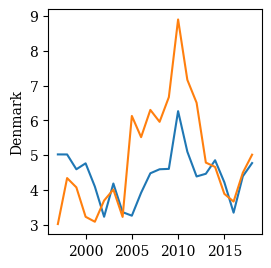

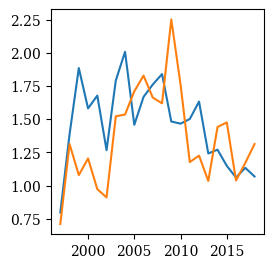

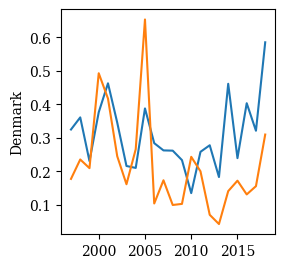

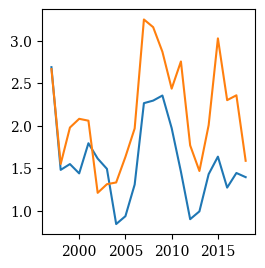

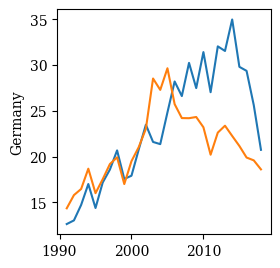

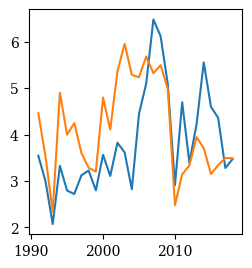

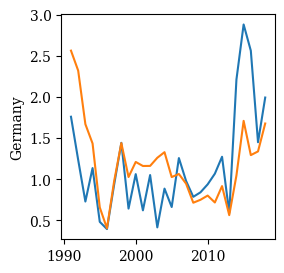

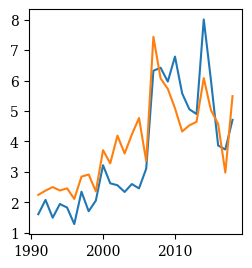

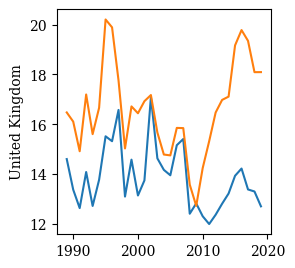

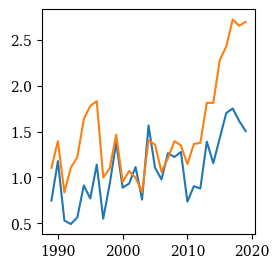

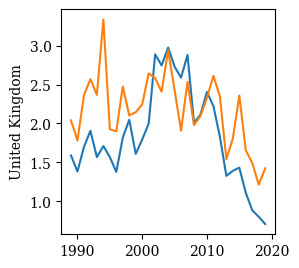

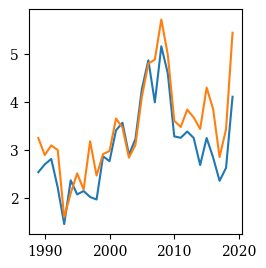

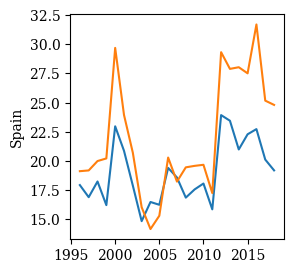

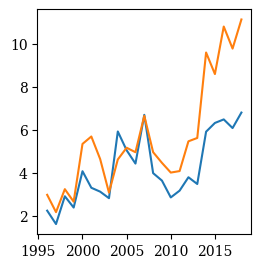

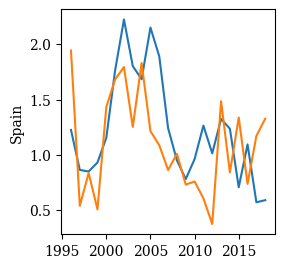

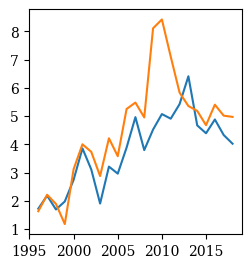

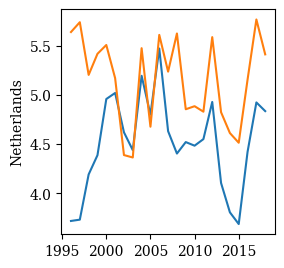

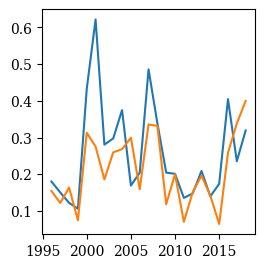

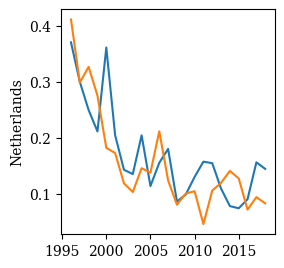

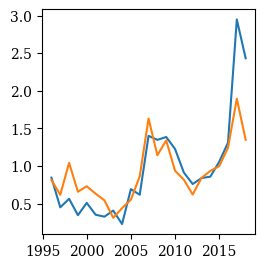

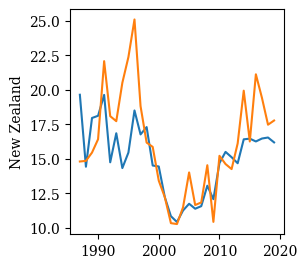

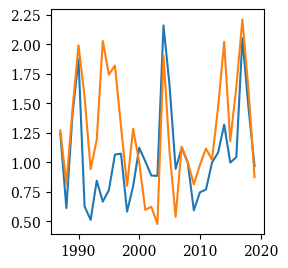

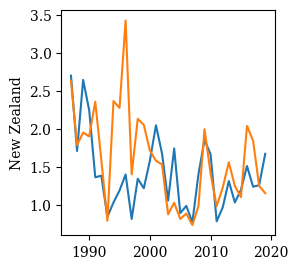

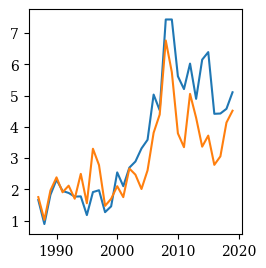

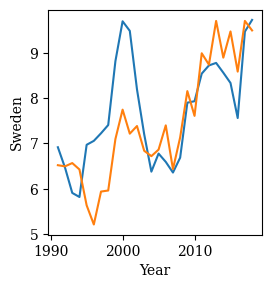

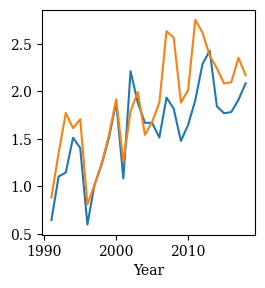

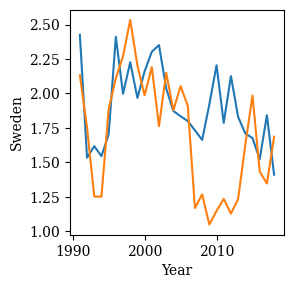

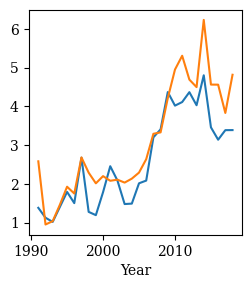

In [6]:
for corp in corp_list:
    for topic in topic_list:
        plot_df = df.loc[df['corp'] == corp]
        fig, ax = plt.subplots(figsize=(8.27/3, 11.69/4))
#         ax2 = ax.twinx()  # Create a second y-axis on the right side
        if corp == 'aut':
            sns.lineplot(x='year', y=topic+'_nonleft_dist_prop', data=plot_df, label='Nonleft', ax=ax, ci = None).set(title = topic_dict[topic])
        else:
            sns.lineplot(x='year', y=topic+'_nonleft_dist_prop', data=plot_df, label='Nonleft', ax=ax, ci = None)
        sns.lineplot(x='year', y=topic+'_left_dist_prop', data=plot_df, label='Left', ax=ax, ci = None)
#         sns.lineplot(x='year', y=topic+'_polarisation', data=plot_df, label='Polarisation', ax=ax2, color = 'red', linestyle = '--',ci = 'sd')
        
        if topic == 'soc':
            ax.set_ylabel(corp_dict[corp])
        else:
            ax.set_ylabel('')
        
        if corp == 'swe':
            ax.set_xlabel('Year')
        else:
            ax.set_xlabel('')
#         ax2.set_ylabel('Polarisation')
#         ax2.set_ylim(60, 100)

#         h1, l1 = ax.get_legend_handles_labels()
#         h2, l2 = ax2.get_legend_handles_labels()
#         ax.legend(h1 + h2, l1 + l2, loc = 2)
        ax.legend().remove()
        plt.savefig(r'/maps/hdir/gsw508/Thesis/Images/'+corp+topic+'.png', bbox_inches='tight')
        plt.show()